# Milton Hotels Portfolio Analysis

## Business Objective
The goal of this project is to understand how Milton Hotels can increase revenue and guest satisfaction while controlling operational and energy costs across its hotel portfolio.

## Dataset Overview

This dataset contains daily operational, financial, guest experience, and energy metrics for multiple Milton Hotels.

Key metric groups:
- Financial performance (ADR, RevPAR, Revenue)
- Guest experience (Satisfaction Score)
- Operational efficiency (Check-in time, Housekeeping time, Staffing)
- Sustainability (Energy consumption per room)


## Data Cleaning & Preparation

Before analysis, the dataset was cleaned to ensure consistency and reliability.
Key steps included:
- Converting date columns to datetime format
- Standardizing column names
- Creating derived metrics such as occupancy rate
- Validating revenue-related calculations


### 1. Import Libraries & Load Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
# Load data
df = pd.read_csv('milton_hotels_occupancy_revenue_operations.csv')

print(df.shape)
df.head()

(7600, 17)


,Date,Hotel_ID,Hotel_Name,City,Country,Available_Rooms,Occupied_Rooms,ADR (USD),RevPAR (USD),Total_Room_Revenue (USD),Guest_Satisfaction_Score,Complaint_Resolution_Time_Hours,Checkin_Time_Minutes,Checkout_Time_Minutes,Housekeeping_Turnover_Time_Min,Staff_to_Guest_Ratio,Energy_Consumption_per_Room_kWh
0,2025-01-01,MIL001,Milton Times Square,New York,USA,650,539,253.78,210.44,136787.42,9.1,1.6,6.7,4.7,36,0.27,42.4
1,2025-01-01,MIL002,Milton Marina Bay,Singapore,Singapore,720,671,238.87,222.61,160281.77,9.0,1.6,6.8,5.4,33,0.25,38.6
2,2025-01-01,MIL003,Milton Downtown Chicago,Chicago,USA,420,285,274.14,186.02,78129.90,8.2,2.2,9.5,5.1,33,0.27,36.4
3,2025-01-01,MIL004,Milton Hyde Park,London,UK,510,325,208.21,132.68,67668.25,8.9,1.3,10.3,7.4,36,0.24,36.9
4,2025-01-01,MIL005,Milton Shinjuku,Tokyo,Japan,680,489,343.35,246.91,167898.15,8.7,1.3,10.1,5.3,34,0.24,40.7


In [3]:
# Check column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             7600 non-null   object 
 1   Hotel_ID                         7600 non-null   object 
 2   Hotel_Name                       7600 non-null   object 
 3   City                             7600 non-null   object 
 4   Country                          7600 non-null   object 
 5   Available_Rooms                  7600 non-null   int64  
 6   Occupied_Rooms                   7600 non-null   int64  
 7   ADR (USD)                        7600 non-null   float64
 8   RevPAR (USD)                     7600 non-null   float64
 9   Total_Room_Revenue (USD)         7600 non-null   float64
 10  Guest_Satisfaction_Score         7600 non-null   float64
 11  Complaint_Resolution_Time_Hours  7600 non-null   float64
 12  Checkin_Time_Minutes

### 2. Data Cleaning & Validation

In [4]:
# Standardize column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "")
    .str.replace(")", "")
)

df.head()

,date,hotel_id,hotel_name,city,country,available_rooms,occupied_rooms,adr_usd,revpar_usd,total_room_revenue_usd,guest_satisfaction_score,complaint_resolution_time_hours,checkin_time_minutes,checkout_time_minutes,housekeeping_turnover_time_min,staff_to_guest_ratio,energy_consumption_per_room_kwh
0,2025-01-01,MIL001,Milton Times Square,New York,USA,650,539,253.78,210.44,136787.42,9.1,1.6,6.7,4.7,36,0.27,42.4
1,2025-01-01,MIL002,Milton Marina Bay,Singapore,Singapore,720,671,238.87,222.61,160281.77,9.0,1.6,6.8,5.4,33,0.25,38.6
2,2025-01-01,MIL003,Milton Downtown Chicago,Chicago,USA,420,285,274.14,186.02,78129.90,8.2,2.2,9.5,5.1,33,0.27,36.4
3,2025-01-01,MIL004,Milton Hyde Park,London,UK,510,325,208.21,132.68,67668.25,8.9,1.3,10.3,7.4,36,0.24,36.9
4,2025-01-01,MIL005,Milton Shinjuku,Tokyo,Japan,680,489,343.35,246.91,167898.15,8.7,1.3,10.1,5.3,34,0.24,40.7


In [5]:
# Remove brand name from 'hotel_name' column
df["hotel_name"] = (
    df["hotel_name"]
    .str.replace("Milton", "", regex=False)
    .str.strip()
)

df.head()

,date,hotel_id,hotel_name,city,country,available_rooms,occupied_rooms,adr_usd,revpar_usd,total_room_revenue_usd,guest_satisfaction_score,complaint_resolution_time_hours,checkin_time_minutes,checkout_time_minutes,housekeeping_turnover_time_min,staff_to_guest_ratio,energy_consumption_per_room_kwh
0,2025-01-01,MIL001,Times Square,New York,USA,650,539,253.78,210.44,136787.42,9.1,1.6,6.7,4.7,36,0.27,42.4
1,2025-01-01,MIL002,Marina Bay,Singapore,Singapore,720,671,238.87,222.61,160281.77,9.0,1.6,6.8,5.4,33,0.25,38.6
2,2025-01-01,MIL003,Downtown Chicago,Chicago,USA,420,285,274.14,186.02,78129.90,8.2,2.2,9.5,5.1,33,0.27,36.4
3,2025-01-01,MIL004,Hyde Park,London,UK,510,325,208.21,132.68,67668.25,8.9,1.3,10.3,7.4,36,0.24,36.9
4,2025-01-01,MIL005,Shinjuku,Tokyo,Japan,680,489,343.35,246.91,167898.15,8.7,1.3,10.1,5.3,34,0.24,40.7


In [6]:
# Convert date column to actual dates
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Drop missing dates after conversion (if any)
df = df.dropna(subset=["date"])

In [7]:
# Create date features
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["month_name"] = df["date"].dt.month_name()
df["day"] = df["date"].dt.day
df["day_of_week"] = df["date"].dt.day_name()
df["is_weekend"] = df["day_of_week"].isin(["Saturday", "Sunday"]).astype(int)

In [8]:
# Validate room-related features
df = df[
    (df["available_rooms"] > 0) &
    (df["occupied_rooms"] >= 0) &
    (df["occupied_rooms"] <= df["available_rooms"])
]

In [9]:
# Validate revenue-related features
df = df[
    (df["adr_usd"] > 0) &
    (df["total_room_revenue_usd"] >= 0) &
    (df["revpar_usd"] <= df["adr_usd"])
]

In [10]:
# Validate service and operational features
df = df[
    (df["checkin_time_minutes"] >= 0) &
    (df["checkout_time_minutes"] >= 0) &
    (df["guest_satisfaction_score"].between(1, 10)) &
    (df["energy_consumption_per_room_kwh"] > 0)
]

In [11]:
df = df.copy()

In [12]:
# Save cleaned data
df.to_csv("milton_hotels_cleaned.csv", index=False)

A copy of the cleaned dataset was used for all subsequent analysis.


###3. Feature Engineering & KPIs

In [13]:
# Calculate occupancy rate
df["occupancy_rate"] = df["occupied_rooms"] / df["available_rooms"]

In [14]:
# Calculate revenue per occupied room
df["revenue_per_occupied_room"] = (
    df["total_room_revenue_usd"] / df["occupied_rooms"]
)

In [15]:
# Revenue efficiency index
df["revenue_efficiency_index"] = df["revpar_usd"] / df["adr_usd"]


### 4. Exploratory Data Analysis (EDA)

### EDA 4.1  -  Revenue Structure

This analysis examines whether revenue is driven more by room pricing (ADR) or by demand (occupancy).


In [16]:
# ADR vs RevPAR
adr_revpar_corr = df["adr_usd"].corr(df["revpar_usd"])
adr_revpar_corr

np.float64(0.8122592339318939)

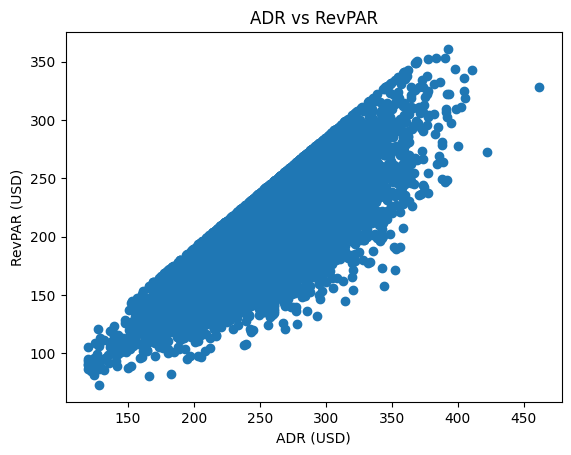

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df["adr_usd"], df["revpar_usd"])
plt.xlabel("ADR (USD)")
plt.ylabel("RevPAR (USD)")
plt.title("ADR vs RevPAR");

In [18]:
# Occupancy vs RevPAR
occ_revpar_corr = df["occupancy_rate"].corr(df["revpar_usd"])
occ_revpar_corr

np.float64(0.5752367342357271)

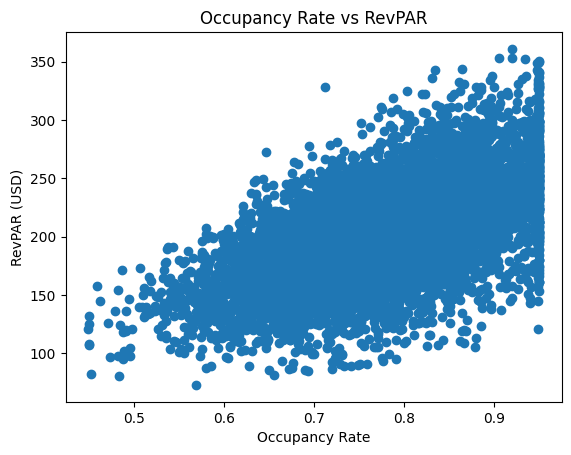

In [19]:
plt.figure()
plt.scatter(df["occupancy_rate"], df["revpar_usd"])
plt.xlabel("Occupancy Rate")
plt.ylabel("RevPAR (USD)")
plt.title("Occupancy Rate vs RevPAR");

Results show that pricing has a stronger relationship with revenue than occupancy, suggesting pricing strategy is the primary revenue lever.


### EDA 4.2  - Guest Satisfaction Drivers

This section explores whether operational pressure or demand levels affect guest satisfaction.

In [20]:
# Complaint Resolution Time vs Satisfaction
df["complaint_resolution_time_hours"].corr(df["guest_satisfaction_score"])

np.float64(-0.004159141272385053)

In [21]:
# Occupancy Rate vs Satisfaction
df["occupancy_rate"].corr(df["guest_satisfaction_score"])

np.float64(0.009275062643909057)

**Let us try comparing other factors that may affect guest satisfaction**

In [22]:
# Group features to be used together
satisfaction_features = [
    "guest_satisfaction_score",
    "occupancy_rate",
    "housekeeping_turnover_time_min",
    "staff_to_guest_ratio"
]

# Find correlation between them
satisfaction_corr = df[satisfaction_features].corr()
satisfaction_corr

,guest_satisfaction_score,occupancy_rate,housekeeping_turnover_time_min,staff_to_guest_ratio
guest_satisfaction_score,1.000000,0.009275,-0.010033,-0.009512
occupancy_rate,0.009275,1.000000,0.015848,0.005375
housekeeping_turnover_time_min,-0.010033,0.015848,1.000000,-0.009362
staff_to_guest_ratio,-0.009512,0.005375,-0.009362,1.000000


In [23]:
# Sort scores in descending order
satisfaction_corr["guest_satisfaction_score"].sort_values(ascending=False)

,guest_satisfaction_score
guest_satisfaction_score,1.000000
occupancy_rate,0.009275
staff_to_guest_ratio,-0.009512
housekeeping_turnover_time_min,-0.010033


Guest satisfaction remains stable across demand and operational conditions, indicating consistent service quality across the portfolio.

### EDA 4.3 - Operational Efficiency

This analysis evaluates whether higher occupancy creates operational bottlenecks.


In [24]:
operational_features = [
    "occupancy_rate",
    "checkin_time_minutes",
    "checkout_time_minutes",
    "housekeeping_turnover_time_min",
    "staff_to_guest_ratio"
]

operational_corr = df[operational_features].corr()
operational_corr

,occupancy_rate,checkin_time_minutes,checkout_time_minutes,housekeeping_turnover_time_min,staff_to_guest_ratio
occupancy_rate,1.000000,0.008307,-0.000554,0.015848,0.005375
checkin_time_minutes,0.008307,1.000000,0.014489,-0.010866,-0.014493
checkout_time_minutes,-0.000554,0.014489,1.000000,-0.005721,0.003993
housekeeping_turnover_time_min,0.015848,-0.010866,-0.005721,1.000000,-0.009362
staff_to_guest_ratio,0.005375,-0.014493,0.003993,-0.009362,1.000000


In [25]:
operational_corr["occupancy_rate"].sort_values(ascending=False)

,occupancy_rate
occupancy_rate,1.000000
housekeeping_turnover_time_min,0.015848
checkin_time_minutes,0.008307
staff_to_guest_ratio,0.005375
checkout_time_minutes,-0.000554


Operational KPIs show minimal sensitivity to increasing occupancy, suggesting operations scale effectively with demand.

### EDA 4.4 - Energy Efficiency

This section assesses whether energy consumption increases with demand or revenue growth.


In [26]:
# Correlation analysis

energy_features = [
    "energy_consumption_per_room_kwh",
    "occupancy_rate",
    "revpar_usd"
]

energy_corr = df[energy_features].corr()
energy_corr

,energy_consumption_per_room_kwh,occupancy_rate,revpar_usd
energy_consumption_per_room_kwh,1.000000,-0.005605,-0.004277
occupancy_rate,-0.005605,1.000000,0.575237
revpar_usd,-0.004277,0.575237,1.000000


In [27]:
energy_corr["energy_consumption_per_room_kwh"]

,energy_consumption_per_room_kwh
energy_consumption_per_room_kwh,1.000000
occupancy_rate,-0.005605
revpar_usd,-0.004277


Energy consumption per room remains stable regardless of occupancy or revenue, indicating strong energy cost control.


## Final Conclusion

This project demonstrates how data can be used to support pricing-led revenue growth while maintaining guest satisfaction and cost efficiency.